
# Import data


In [67]:
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas as pd
import numpy as np


In [69]:
train = pd.read_csv('training_set.csv')
test = pd.read_csv('test_set.csv')

In [71]:

dt = pd.DataFrame(test)
df = pd.DataFrame(train)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,999,0,2.9,1,11,1,64,0.2,199,4,...,1397,1616,2593,14,11,16,1,1,0,2
1,1265,0,0.6,1,4,1,49,0.5,90,1,...,275,687,1518,16,11,8,1,0,1,1
2,1000,1,0.5,0,12,0,63,0.7,179,8,...,1537,1761,3744,11,1,7,0,0,1,3
3,1874,1,2.7,1,10,0,8,0.9,166,7,...,964,1233,1246,8,1,2,0,0,1,1
4,1658,1,1.4,1,0,1,38,0.3,159,5,...,51,739,2609,12,11,19,1,0,0,2


This report helped us to get a global perspective of the data, and tying to find a business meaning.

from pandas_profiling import ProfileReport
report = ProfileReport(train, minimal=False)
report

In [73]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,999,0,2.9,1,11,1,64,0.2,199,4,...,1397,1616,2593,14,11,16,1,1,0,2
1,1265,0,0.6,1,4,1,49,0.5,90,1,...,275,687,1518,16,11,8,1,0,1,1
2,1000,1,0.5,0,12,0,63,0.7,179,8,...,1537,1761,3744,11,1,7,0,0,1,3
3,1874,1,2.7,1,10,0,8,0.9,166,7,...,964,1233,1246,8,1,2,0,0,1,1
4,1658,1,1.4,1,0,1,38,0.3,159,5,...,51,739,2609,12,11,19,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1975,1,1.9,1,2,0,31,0.9,151,1,...,775,1607,3022,13,5,19,0,0,1,3
1336,589,1,0.5,0,1,1,59,0.7,146,8,...,759,1858,362,16,10,6,1,1,1,0
1337,1829,1,0.5,0,0,1,15,0.4,160,5,...,729,1267,2080,16,11,12,1,0,1,2
1338,1927,0,0.9,1,3,0,11,0.4,190,8,...,491,1506,2916,16,11,18,0,1,1,3


# Data split 1 (full dataset)
First approach without deleting or transforming variables

In [75]:
X = df.drop(['price_range'], axis=1)

y = df['price_range']


In [77]:
# split X and y into training and testing sets
# The random state (42) and the test size (0.4) would be the same for the entire notebook

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [78]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((804, 20), (536, 20))

In [79]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
666,1352,0,2.4,0,5,1,6,0.9,92,6,9,629,1299,1309,12,1,14,1,0,0
682,841,1,0.5,1,8,0,39,0.1,199,6,13,546,828,2942,11,5,16,0,1,1
256,1893,1,2.1,1,8,0,63,0.2,134,2,11,637,763,3822,14,3,18,0,1,1
25,999,0,2.6,1,11,1,56,1.0,165,4,13,342,1641,3083,8,4,11,1,1,1
336,1615,1,2.8,0,3,0,9,0.9,117,1,13,542,678,2948,8,3,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1623,1,1.2,0,6,1,61,0.9,120,7,12,1568,1832,1510,12,10,17,1,1,0
1130,1694,1,0.6,0,0,1,34,0.3,102,7,7,377,549,2298,17,5,2,1,1,0
1294,892,1,0.5,0,0,1,47,0.4,94,1,18,655,1782,1241,12,3,9,1,0,1
860,1368,1,1.6,1,4,0,9,0.1,115,7,7,843,1145,2941,13,12,17,0,1,0


# Decision Tree Classifier 
This part performs the worst, as expected. Here we are using the raw data as a first approach, later on we will focus on doing some transformation and cleaning.
Then after Random Forest, we looked for the model with the best performance

In [80]:
X_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [81]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred = classifier.predict(X_test)


In [83]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))



[[118  25   0   0]
 [ 19  95  18   0]
 [  0  14  91  25]
 [  0   0  25 106]]


In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       143
           1       0.71      0.72      0.71       132
           2       0.68      0.70      0.69       130
           3       0.81      0.81      0.81       131

    accuracy                           0.76       536
   macro avg       0.76      0.76      0.76       536
weighted avg       0.77      0.76      0.77       536



In [85]:
# Print the scores on training and test set

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Test set score: 0.7649


[Text(327.6331875, 416.76, 'X[13] <= 2735.5\ngini = 0.75\nsamples = 804\nvalue = [188, 206, 208, 202]'),
 Text(167.504625, 380.52, 'X[13] <= 1067.0\ngini = 0.663\nsamples = 531\nvalue = [188, 206, 131, 6]'),
 Text(50.220000000000006, 344.28, 'X[11] <= 1229.0\ngini = 0.182\nsamples = 158\nvalue = [142, 16, 0, 0]'),
 Text(33.480000000000004, 308.03999999999996, 'X[12] <= 1892.0\ngini = 0.103\nsamples = 147\nvalue = [139, 8, 0, 0]'),
 Text(20.088, 271.79999999999995, 'X[11] <= 593.5\ngini = 0.069\nsamples = 139\nvalue = [134, 5, 0, 0]'),
 Text(13.392000000000001, 235.55999999999997, 'gini = 0.0\nsamples = 90\nvalue = [90, 0, 0, 0]'),
 Text(26.784000000000002, 235.55999999999997, 'X[11] <= 596.5\ngini = 0.183\nsamples = 49\nvalue = [44, 5, 0, 0]'),
 Text(20.088, 199.32, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(33.480000000000004, 199.32, 'X[13] <= 1021.5\ngini = 0.153\nsamples = 48\nvalue = [44, 4, 0, 0]'),
 Text(26.784000000000002, 163.07999999999998, 'X[0] <= 1808.0\ngini 

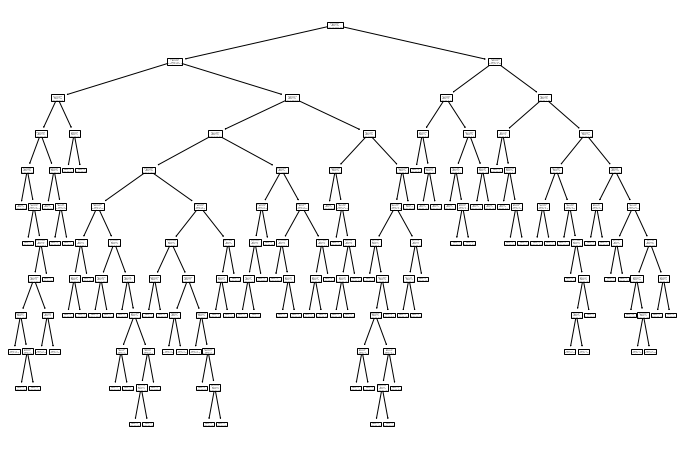

In [86]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

# Random Forest

## Default Parameters


In [87]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8638


## Find important features with Random Forest model
At this point, after testing with raw data, we want to check the most important variance. Later on we will check correlation and do all the transformation we find necessary to do the best performance

In [88]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=42)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ram              0.418698
battery_power    0.074905
px_height        0.060847
px_width         0.060655
mobile_wt        0.044840
int_memory       0.040441
clock_speed      0.036338
talk_time        0.036149
sc_w             0.034523
pc               0.031581
fc               0.030615
m_dep            0.030183
sc_h             0.029928
n_cores          0.026252
touch_screen     0.008030
dual_sim         0.007831
blue             0.007423
wifi             0.007310
four_g           0.007177
three_g          0.006276
dtype: float64

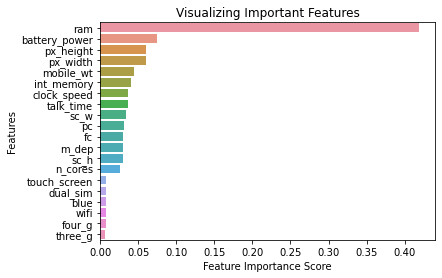

In [90]:
import seaborn as sns

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()


# Data Transformation

### Binary Variables
As we saw on the last plot binary variables are the least important, I am gonna try some transformations just in case we can get something useful before deleting them

In [91]:
# Using OneHotEncoder on the dummy variables to see if it improves the model. Exmample: instead of having a wifi (0,1) variables you create two wifi_0 wifi_1
#Later on we find that dummy variables in this dataset are not important, and after duplicating them, they are even less importatn

from sklearn.preprocessing import OneHotEncoder


encoder=OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame (encoder.fit_transform(df[['wifi', 'three_g','four_g', 'blue','dual_sim', 'touch_screen']]))

df_encoded.columns = encoder.get_feature_names(['wifi', 'three_g','four_g', 'blue','dual_sim', 'touch_screen'])


df_enc = pd.concat([df, df_encoded ], axis=1)

df_enc.drop(['wifi', 'three_g','four_g', 'blue','dual_sim', 'touch_screen'] ,axis=1, inplace=True)


In [92]:
df_enc

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,...,three_g_0,three_g_1,four_g_0,four_g_1,blue_0,blue_1,dual_sim_0,dual_sim_1,touch_screen_0,touch_screen_1
0,999,2.9,11,64,0.2,199,4,19,1397,1616,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1265,0.6,4,49,0.5,90,1,5,275,687,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1000,0.5,12,63,0.7,179,8,18,1537,1761,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1874,2.7,10,8,0.9,166,7,13,964,1233,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1658,1.4,0,38,0.3,159,5,0,51,739,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1975,1.9,2,31,0.9,151,1,17,775,1607,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1336,589,0.5,1,59,0.7,146,8,4,759,1858,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1337,1829,0.5,0,15,0.4,160,5,7,729,1267,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1338,1927,0.9,3,11,0.4,190,8,12,491,1506,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


After this transformation we check importance and it was even worse because we got, 10 bad variables instead of 5. But it was a good practice for something that might be useful for different cases.

## Correlation

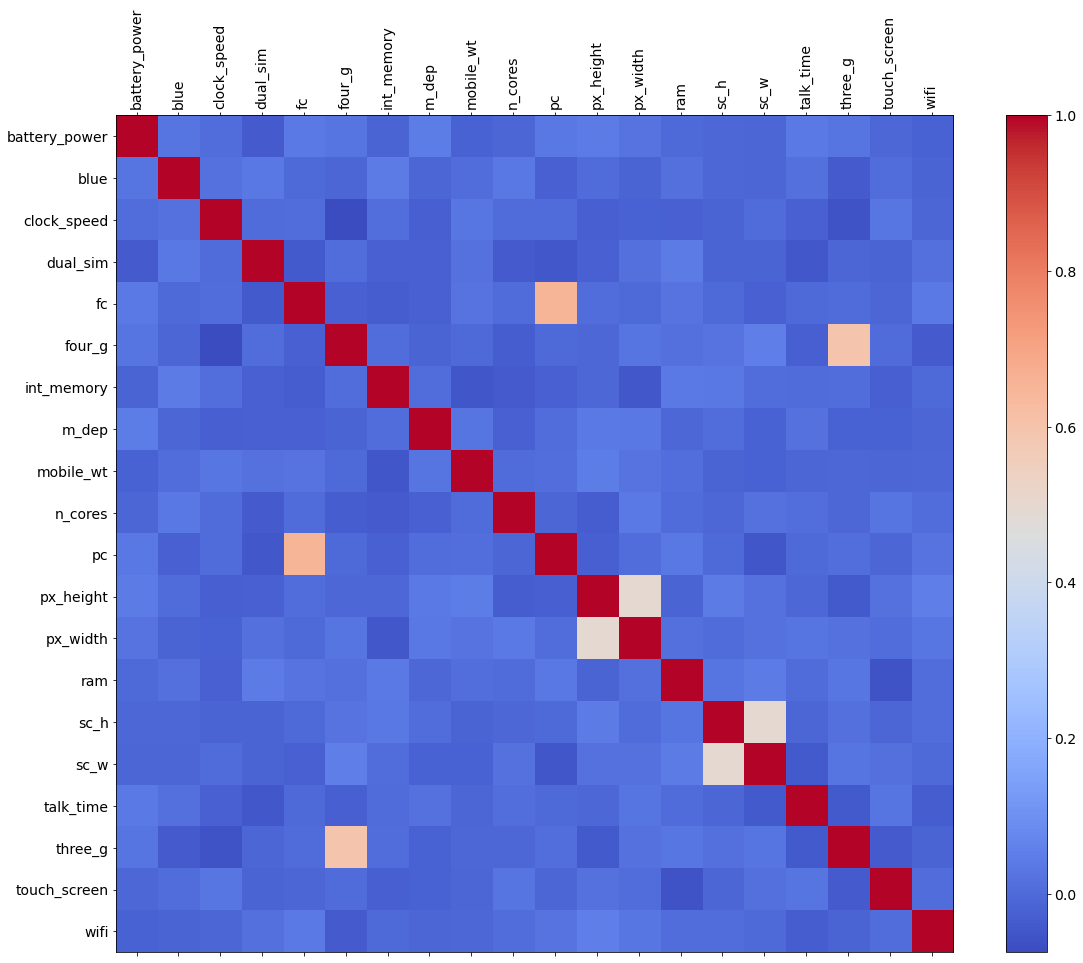

In [93]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.iloc[:,0:20].corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(train.iloc[:,0:20].shape[1]), train.iloc[:,0:20].columns, fontsize=14, rotation=90)
plt.yticks(range(train.iloc[:,0:20].shape[1]), train.iloc[:,0:20].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Here we can see that, in general, there is no correlation. We can highlight 4 pairs: pc and fc, four_g and three_g, sc_h and sc_w, px_height and px_width.  

## Variables transformation
We tried many approaches for the four correlated pairs, subtracting one of the two, adding when possible and some more. The only change in which we improve the model was combining the pixel width and height. We first multiply but we found that adding, probably because its doesn't penalize that much phones with low resolution and does not have that many extreme values, even after standardization.

In [94]:
#Combining two varaibles in one
df = train 
df['resolution'] = (df['px_height']+df['px_width'])
df



df = df.drop(['px_height','px_width'],axis=1)

## Selecting Important Variables.
From now on, we use tuning to try and error to determine most important variables. For the hyper parameters we used tuning, but since we tried a lot of transformations we determined the variables used with try and error:
'ram', 'battery_power','resolution','mobile_wt


<AxesSubplot:>

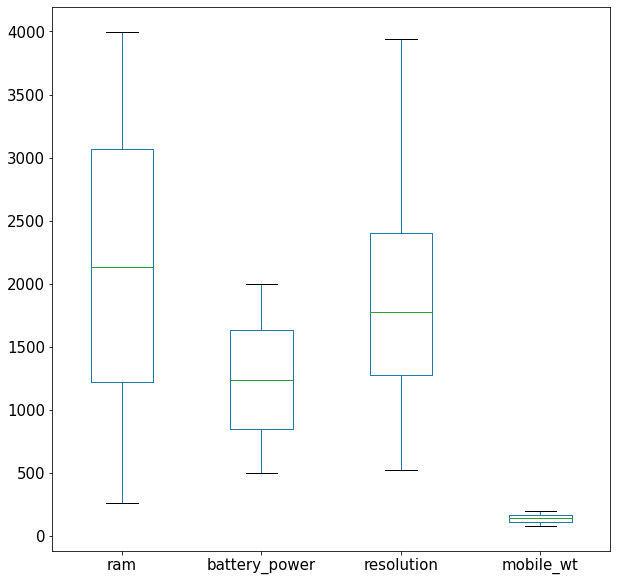

In [95]:
plt.figure(figsize=(10,10))
df.boxplot(['ram', 'battery_power','resolution','mobile_wt'], grid=False, fontsize=15)

# Standardization
It is not necessary for Random Forest but since SVM works with distances, we need to work with the same range. We are gonna standard the variables. Because, as we see on the plot before, the units are really different

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_std = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [97]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
394,1940,1,1.0,1,0,1,5,0.2,194,4,1,588,1809,820,19,18,3,1,1,1
881,1494,0,1.6,0,3,1,45,0.8,158,5,4,449,790,3208,11,9,4,1,0,0
358,1117,1,0.6,1,0,0,31,0.2,146,2,7,1258,1627,2003,8,7,14,0,1,1
367,966,0,2.0,0,8,1,34,0.5,118,2,10,214,1523,3534,18,17,11,1,1,1
259,1799,0,1.0,0,1,1,30,0.6,123,3,9,617,1386,445,10,8,10,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,1070,1,3.0,0,9,0,19,0.8,160,7,16,90,1614,2647,14,13,20,0,1,0
930,538,0,1.1,1,0,1,25,0.3,163,7,7,455,537,2215,9,3,17,1,1,1
697,1811,0,2.9,0,0,0,33,0.2,132,8,2,1099,1553,2610,8,3,13,1,1,0
890,1547,0,2.9,1,6,0,45,0.7,166,2,8,583,590,505,12,2,3,0,1,1


import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_n=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
df_n


df_num = df
df_st = (df_num-df_num.mean())/df_num.std()
df_st[['blue',"touch_screen","wifi",'four_g','three_g',"price_range"]] = df[['blue',"touch_screen","wifi",'four_g','three_g',"price_range"]]
df_st

# Data split 2 - After transformation
We have tried many things, the most important and the ones we applied:
· Dropping non important variables
· Standardization
· Changing px_height and px_width to resolution


In [98]:
from sklearn.model_selection import train_test_split

X = df[df != df['price_range']]
y = df['price_range']


In [99]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_std = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)

In [101]:

X_train_std[['blue',"touch_screen","wifi",'four_g','three_g',"price_range"]] = df[['blue',"touch_screen","wifi",'four_g','three_g',"price_range"]]
X_test_std[['blue',"touch_screen","wifi",'four_g','three_g',"price_range"]] = df[['blue',"touch_screen","wifi",'four_g','three_g',"price_range"]]


In [102]:
X_train_std

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,resolution
666,0.278191,0,1.058316,-1.058949,0.179073,1,-1.442141,1.398745,-1.367898,0.661333,-0.130325,-0.793815,-0.057466,-1.092386,0.541325,1,0,0,1,0.048747
682,-0.874688,1,-1.241376,0.944333,0.870150,0,0.365782,-1.419778,1.664481,0.661333,0.525584,0.726206,-0.294402,-0.180126,0.904770,0,1,1,2,-0.691740
256,1.498753,1,0.695207,0.944333,0.870150,0,1.680635,-1.067463,-0.177618,-1.081984,0.197630,1.545323,0.416406,-0.636256,1.268215,0,1,1,3,-0.656988
25,-0.518221,0,1.300389,0.944333,1.561227,1,1.297137,1.751060,0.700921,-0.210326,0.525584,0.857451,-1.005209,-0.408191,-0.003842,1,1,1,2,0.122261
336,0.871551,1,1.542462,-1.058949,-0.281645,0,-1.277784,1.398745,-0.659398,-1.517813,0.525584,0.731791,-1.005209,-0.636256,-1.457622,1,1,0,2,-0.897580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.889600,1,-0.394121,-1.058949,0.409432,1,1.571064,1.398745,-0.574378,1.097162,0.361607,-0.606721,-0.057466,0.960199,1.086492,1,1,0,2,2.016250
1130,1.049784,1,-1.120340,-1.058949,-0.972723,1,0.091854,-0.715148,-1.084498,1.097162,-0.458280,0.126761,1.127213,-0.180126,-1.639344,1,1,0,2,-1.290546
1294,-0.759626,1,-1.241376,-1.058949,-0.972723,1,0.804067,-0.362832,-1.311218,-1.517813,1.345472,-0.857110,-0.057466,-0.636256,-0.367287,1,0,1,1,0.729086
860,0.314288,1,0.090025,0.944333,-0.051286,0,-1.277784,-1.419778,-0.716078,1.097162,-0.458280,0.725275,0.179470,1.416329,1.086492,0,1,0,3,0.128944


# Random Forest

In [103]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state = 42)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test_std)


from sklearn import metrics

# Check accuracy score 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7742537313432836


### Bagging
Here we tried Bagging but since it's meant to find an optimal variable, but since he had found our optimal in four it's not improving our for variables.

In [104]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=42, max_features=len(X_train.columns))



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results


y_pred = clf.predict(X_test)


from sklearn import metrics

# Check accuracy score 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


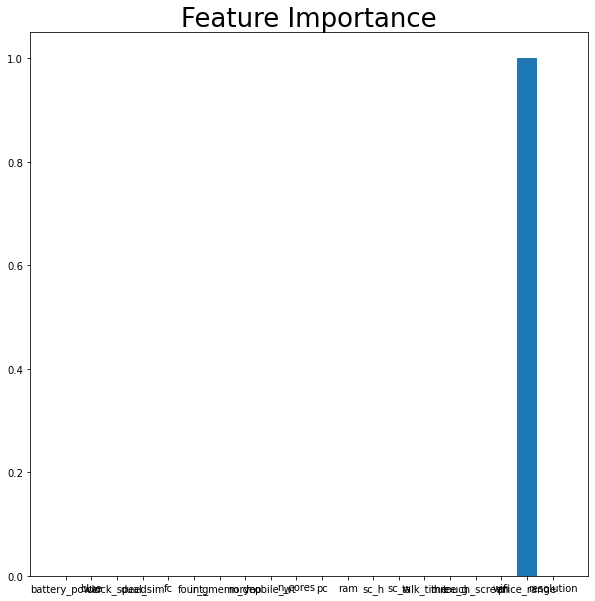

In [105]:
plt.figure(figsize=(10,10))
plt.bar(X_train.columns, clf.feature_importances_)
plt.title('Feature Importance', fontsize=26);

In [106]:
mobile_small = RandomForestClassifier(random_state=45, max_features='sqrt')
mobile_small.fit(X_train[['ram', 'battery_power','resolution','mobile_wt']], y_train)
predictions = mobile_small.predict(X_test[['ram', 'battery_power','resolution','mobile_wt']])
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.8917910447761194


# XGBoost

In [107]:
import xgboost

[13:20:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 1.0000


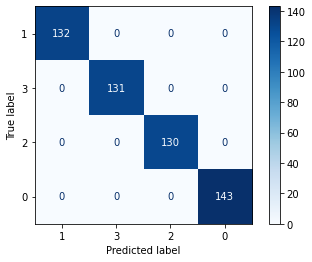

In [108]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

xgb_tree = xgboost.XGBClassifier(objective="binary:logistic", random_state=4)
xgb_tree.fit(X_train, y_train)
predictions = xgb_tree.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,xgb_tree.predict(X_test))))
plot_confusion_matrix(xgb_tree, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues);

### XGBOOST Tuning
I am keeping this part in text because it takes a lot to run, but we tried tuning and didn't improve the default performance

from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_tree, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(search.best_params_)
print()
print("Grid scores on development set:")
print()
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("MSE = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

search.best_estimator_

predictions = search.best_estimator_.predict(X_test)

print("Accuracy = {0:.4f}".format(accuracy_score(y_test,search.best_estimator_.predict(X_test))))
plot_confusion_matrix(search.best_estimator_, X_test, y_test, y_test.unique(), cmap=plt.cm.Blues)



xgboost.plot_importance(search.best_estimator_)

# SVM

#### SVM Tuning
We are gonna do tuning directly and find the optimal hyper parameters. We did it with kernel too but in order to plot it we are assuming linear as optimal, because that is what we got trying it

In [109]:

import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import svm


In [110]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.5,1,5,10], "gamma":[0.01,0.0001,0.00001]}

estimator = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=5)
estimator.fit(X_train, y_train);

The best parameters are {'C': 0.5, 'gamma': 0.01} with a score of 0.96


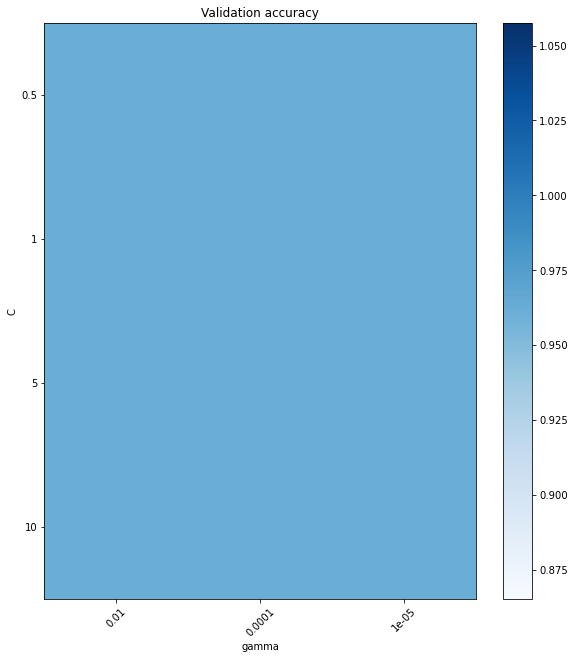

In [111]:
print("The best parameters are %s with a score of %0.2f"
      % (estimator.best_params_, estimator.best_score_))


scores = estimator.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Draw heatmap of the validation accuracy as a function of gamma and C

plt.figure(figsize=(10, 10))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Validation accuracy')
plt.show()

### Optimal SVM configuration

In [112]:
C = 1

clf = svm.SVC(C,kernel='linear', gamma = 0.01)
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.01, kernel='linear')

Naive Bayes Accuracy = 0.9720149253731343


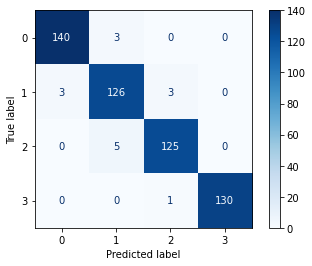

In [113]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

# Predict labels on test
predictions = clf.predict(X_test)

print("Naive Bayes Accuracy = {}".format(accuracy_score(clf.predict(X_test), y_test)))
plot_confusion_matrix(clf, X_test, y_test, [0,1,2,3], cmap=plt.cm.Blues);

### Cross-Validation
We did k-fold cross validation with 10 splits to get a more reliable performance and std. We had a good accuracy and a low std with our model, so this helped to confirm our final model

In [114]:
# evaluate a SVM model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=42, shuffle=True)
# create model
model = clf
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.982 (0.013)


# Training with 100% data and predicting
Now that we have our final model, we want to train it with the entire dataset in order to make the best predictions. Then, we create the predictions and export them in a new data frame.

In [115]:
clf100 = clf

In [116]:
clf100.fit(X, y)



SVC(C=1, gamma=0.01, kernel='linear')

In [117]:
scaler.fit(test)
Predictions_scaled = scaler.transform(test)


In [118]:
dt_st = test
dt_st[['blue',"touch_screen","wifi",'four_g','three_g']] = df[['blue',"touch_screen","wifi",'four_g','three_g']]
dt_st['resolution'] = dt_st['px_height']+dt_st['px_width']
df_st = dt_st.drop(['px_height','px_width'],axis=1)
dt_st

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,resolution
0,1646,0,2.5,0,3,1,25,0.6,200,2,...,211,1608,686,8,6,11,1,1,0,1819
1,1182,0,0.5,0,7,1,8,0.5,138,8,...,275,986,2563,19,17,19,1,0,1,1261
2,1972,1,2.9,0,9,0,14,0.4,196,7,...,293,952,1316,8,1,8,0,0,1,1245
3,989,1,2.0,0,4,0,17,0.2,166,3,...,256,1394,3892,18,7,19,0,0,1,1650
4,615,1,0.5,1,7,1,58,0.5,130,5,...,1021,1958,1906,14,5,5,1,0,0,2979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1308,0,1.3,1,8,1,46,0.9,199,1,...,275,989,488,5,3,9,1,1,1,1264
656,504,0,2.8,1,2,1,54,0.4,163,2,...,1207,1539,2378,17,11,2,1,1,1,2746
657,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,0,0,1987
658,1748,1,1.7,1,6,0,14,0.5,146,3,...,859,1234,3968,16,12,3,1,1,1,2093


In [119]:
Xt = dt_st[['ram', 'battery_power','resolution','mobile_wt']]
Xt

,ram,battery_power,resolution,mobile_wt
0,686,1646,1819,200
1,2563,1182,1261,138
2,1316,1972,1245,196
3,3892,989,1650,166
4,1906,615,2979,130
...,...,...,...,...
655,488,1308,1264,199
656,2378,504,2746,163
657,3962,1467,1987,122
658,3968,1748,2093,146


In [120]:
X = df[['ram', 'battery_power','resolution','mobile_wt']]
y = df['price_range']





In [121]:
scale = StandardScaler()
scale.fit(X)
X_std = scale.transform(X)
Training = pd.DataFrame(X_std).rename(columns={0:"ram",1:'battery_power',2:'resolution',3:'mobile_wt'})

In [122]:
Training

,ram,battery_power,resolution,mobile_wt
0,0.429293,-0.547855,1.491425,1.669421
1,-0.565343,0.051190,-1.216084,-1.417145
2,1.494248,-0.545603,1.867652,1.103079
3,-0.817009,1.422688,0.414230,0.734956
4,0.444097,0.936246,-1.443140,0.536736
...,...,...,...,...
1335,0.826222,1.650145,0.658447,0.310199
1336,-1.634923,-1.471195,0.968669,0.168614
1337,-0.045356,1.321346,0.148892,0.565053
1338,0.728147,1.542047,0.150212,1.414567


In [123]:
clf100.fit(Training, y)

SVC(C=1, gamma=0.01, kernel='linear')

In [124]:
final_test = dt[['ram', 'battery_power','resolution','mobile_wt']]


In [125]:
Test_std = scale.transform(final_test)

In [126]:
Testing = pd.DataFrame(Test_std).rename(columns={0:"ram",1:'battery_power',2:'resolution',3:'mobile_wt'})

In [127]:
answers = clf100.predict(Testing)
answers

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 2,
       1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 2, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 2, 2, 3, 2, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 1, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 2, 0, 2, 1, 3, 2, 1, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 0, 0, 1, 1, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 1, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 2, 3, 0, 0, 2, 1, 3, 0, 1, 2, 0, 2, 3, 2, 0, 1, 3, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       3, 1, 3, 0, 2, 3, 2, 3, 2, 1, 0, 1, 0, 2, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,